In [1]:
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

### Dataset Description

There are two different datasets which are **"Fetus_trainingdata.csv"** and **"Fetus_testingdata.csv"**.

In [2]:
train = pd.read_csv('Fetus_trainingdata.csv')
test = pd.read_csv('Fetus_testingdata.csv')

>5 random samples of training dataset

In [3]:
train.sample(5)

,Outcome,Age,Ethnics,Biparietal Diameter,Head Circumference,Cerebellum_tr,Cisterna Magna,Estimated Fetal Weight,Nuchal_fold,Abdominal circumference,Femur Length,Va,Vp,Hem,RI (Right),PI (Right),GA_scan_day
157,Healthy,28,3,52.8,191.2,22.3,7.7,475,4.06,176.5,37.1,5.4,5.6,24.2,0.81,1.98,21.714286
43,Preterm,24,2,52.7,199.1,22.6,5.6,460,4.78,170.9,36.7,7.6,5.5,24.9,0.48,0.73,22.285714
144,Preterm,24,4,51.7,186.8,21.2,4.8,404,3.93,162.8,35.0,5.7,7.6,25.0,0.82,1.96,21.571429
8,Healthy,29,1,51.1,188.7,21.8,6.6,470,4.56,171.6,38.5,6.9,6.0,24.7,0.44,0.60,21.857143
268,Healthy,20,4,50.0,181.0,20.6,6.7,333,3.60,151.2,31.3,6.9,7.9,24.6,0.78,1.78,20.714286


>5 random samples of testing dataset

In [4]:
test.sample(5)

,Outcome,Age,Ethnics,Biparietal Diameter,Head Circumference,Cerebellum_tr,Cisterna Magna,Estimated Fetal Weight,Nuchal_fold,Abdominal circumference,Femur Length,Va,Vp,Hem,RI (Right),PI (Right),GA_scan_day
15,Preterm,30,3,50.5,188.2,21.2,5.7,399,3.35,161.0,34.9,6.2,6.3,25.8,0.83,2.24,21.428571
52,Preterm,31,3,52.1,189.1,22.5,4.0,474,4.75,181.1,35.8,6.7,6.1,24.7,0.61,1.08,21.857143
26,Healthy,27,1,53.5,202.5,24.5,7.3,515,4.57,180.7,38.1,5.8,5.2,25.2,0.50,0.79,21.285714
22,Healthy,32,1,52.9,195.6,22.8,4.1,504,5.58,183.9,36.9,7.6,5.4,26.2,0.65,1.21,21.857143
33,Healthy,27,1,51.5,190.0,21.8,4.0,445,5.48,171.6,36.0,5.3,5.0,25.9,0.51,0.76,22.285714


### Statistical Information

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Outcome                  346 non-null    object 
 1   Age                      346 non-null    int64  
 2   Ethnics                  346 non-null    int64  
 3   Biparietal Diameter      346 non-null    float64
 4   Head Circumference       346 non-null    float64
 5   Cerebellum_tr            346 non-null    float64
 6   Cisterna Magna           346 non-null    float64
 7   Estimated Fetal Weight   346 non-null    int64  
 8   Nuchal_fold              346 non-null    float64
 9   Abdominal circumference  346 non-null    float64
 10  Femur Length             346 non-null    float64
 11  Va                       346 non-null    float64
 12  Vp                       346 non-null    float64
 13  Hem                      346 non-null    float64
 14  RI (Right)               3

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Outcome                  58 non-null     object 
 1   Age                      58 non-null     int64  
 2   Ethnics                  58 non-null     int64  
 3   Biparietal Diameter      58 non-null     float64
 4   Head Circumference       58 non-null     float64
 5   Cerebellum_tr            58 non-null     float64
 6   Cisterna Magna           58 non-null     float64
 7   Estimated Fetal Weight   58 non-null     int64  
 8   Nuchal_fold              58 non-null     float64
 9   Abdominal circumference  58 non-null     float64
 10  Femur Length             58 non-null     float64
 11  Va                       58 non-null     float64
 12  Vp                       58 non-null     float64
 13  Hem                      58 non-null     float64
 14  RI (Right)               58 

In [7]:
print("List of dataset features/columns: ")
print(list(train.columns))       # List of column names

List of dataset features/columns: 
['Outcome', 'Age', 'Ethnics', 'Biparietal Diameter', 'Head Circumference', 'Cerebellum_tr', 'Cisterna Magna', 'Estimated Fetal Weight ', 'Nuchal_fold', 'Abdominal circumference', 'Femur Length', 'Va', 'Vp', 'Hem', 'RI (Right)', 'PI (Right)', 'GA_scan_day']


In [8]:
print("Training Dataset rows & columns num: ", train.shape[0], ",", train.shape[1])
print("Testing Dataset rows & columns num: ", test.shape[0], ",", test.shape[1])

Training Dataset rows & columns num:  346 , 17
Testing Dataset rows & columns num:  58 , 17


### Define Custom Dataset and DataLoader

In [9]:
class Fetus_Dataset(Dataset):
    def __init__(self, csv_file, scaler = None, transform=None):
        self.data = pd.read_csv(csv_file)
        self.transform = transform
        self.scaler = scaler

        # Encode the 'Outcome' column (if outcome is "Healthy" then label is 0, else if outcome is "Preterm" then label is 1.)
        self.data['Outcome'] = self.data['Outcome'].apply(lambda label: 0 if label == "Preterm" else 1)

        # Store the names of the feature columns (excluding 'Outcome')
        feature_columns = self.data.columns.drop('Outcome')

        # Standardize the features using the provided scaler
        if self.scaler:
            # Apply the scaler to the feature columns only
            self.data[feature_columns] = self.scaler.transform(self.data[feature_columns])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = torch.tensor(self.data.drop(columns=['Outcome']).iloc[idx].values, dtype = torch.float32)
        y = torch.tensor(self.data.iloc[idx]['Outcome'], dtype = torch.float)

        if self.transform:
            x = self.transform(x)

        return x, y

In [10]:
from sklearn.preprocessing import StandardScaler

# Initialize and fit the scaler on the training data
scaler = StandardScaler()
scaler.fit(train.drop(columns=['Outcome']))

StandardScaler()

>Load **training dataset** & **testing dataset** in Custom Dataset

In [11]:
train_dataset = Fetus_Dataset(csv_file='Fetus_trainingdata.csv', scaler = scaler)
test_dataset = Fetus_Dataset(csv_file='Fetus_testingdata.csv', scaler = scaler)

>Create Dataloader

In [12]:
# Configure batch size and num of workers
batch_size = 32
num_workers = 0

train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle=True, num_workers = num_workers)
test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle=True, num_workers = num_workers)

### Create a neural network model

In [13]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class MLP_Network(nn.Module):
    def __init__(self, input_size):
        super(MLP_Network, self).__init__()
        self.fc1 = nn.Linear(input_size, 10)
        self.fc2 = nn.Linear(10, 5)
        self.fc3 = nn.Linear(5, 1)

    def forward(self, x):
        x = self.fc1(x)   
        x = torch.relu(x)
        x = self.fc2(x)          
        x = torch.relu(x)         
        x = self.fc3(x)
        x = torch.sigmoid(x)      
        return x

In [14]:
model = MLP_Network(16)
print(model)

MLP_Network(
  (fc1): Linear(in_features=16, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=1, bias=True)
)


### Train model

>Configure Hyperparameter

In [15]:
lr = 0.001 # Start with a low learning rate; adjust if needed
num_of_epochs = 80       # Can adjust based on dataset size and convergence

__Try Code__

In [16]:
import copy

def train_model(model, train_loader, test_loader, learning_rate=0.001, num_epochs=100, verbose=True):
    # Initialize lists to store metrics for each epoch
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []
    model_list = []  # To store model state after each epoch

    # Define device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    # Define binary classification-specific loss and optimizer
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device).float()  # Labels to float for BCELoss
            
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(inputs).squeeze()  # Remove extra dimensions if necessary
            loss = criterion(outputs, labels)
            
            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            # Accumulate loss
            running_loss += loss.item() * inputs.size(0)
            
            # Calculate training accuracy
            predicted = (outputs > 0.5).float()  # Threshold at 0.5 for binary classification
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)

        # Calculate average training loss and accuracy
        epoch_train_loss = running_loss / total_train
        epoch_train_accuracy = correct_train / total_train
        train_losses.append(epoch_train_loss)
        train_accuracies.append(epoch_train_accuracy)

        # Evaluation phase
        model.eval()
        running_test_loss = 0.0
        correct_test = 0
        total_test = 0

        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device).float()
                
                outputs = model(inputs).squeeze()
                loss = criterion(outputs, labels)
                
                # Accumulate testing loss
                running_test_loss += loss.item() * inputs.size(0)
                
                # Calculate validation accuracy
                predicted = (outputs > 0.5).float()
                correct_test += (predicted == labels).sum().item()
                total_test += labels.size(0)

        # Calculate average validation loss and accuracy
        epoch_test_loss = running_test_loss / total_test
        epoch_test_accuracy = correct_test / total_test
        test_losses.append(epoch_test_loss)
        test_accuracies.append(epoch_test_accuracy)

        # Store a copy of the model's state after this epoch
        model_list.append(copy.deepcopy(model.state_dict()))

        if verbose and (epoch+1) % 5 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], "
                  f"Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_accuracy * 100:.2f}%, "
                  f"Test Loss: {epoch_test_loss:.4f}, Test Acc: {epoch_test_accuracy * 100:.2f}%")

    results = {
        'train_losses': train_losses,
        'test_losses': test_losses,
        'train_accuracies': train_accuracies,
        'test_accuracies': test_accuracies,
        'model_list': model_list
    }

    return results

In [17]:
results = train_model(model, train_loader, test_loader, learning_rate=lr, num_epochs=num_of_epochs, verbose=True)

Epoch [5/80], Train Loss: 0.7127, Train Acc: 50.00%, Test Loss: 0.7114, Test Acc: 50.00%
Epoch [10/80], Train Loss: 0.7005, Train Acc: 50.00%, Test Loss: 0.6940, Test Acc: 50.00%
Epoch [15/80], Train Loss: 0.6816, Train Acc: 51.73%, Test Loss: 0.6615, Test Acc: 55.17%
Epoch [20/80], Train Loss: 0.6513, Train Acc: 59.54%, Test Loss: 0.6182, Test Acc: 72.41%
Epoch [25/80], Train Loss: 0.6204, Train Acc: 65.32%, Test Loss: 0.5755, Test Acc: 70.69%
Epoch [30/80], Train Loss: 0.5938, Train Acc: 68.50%, Test Loss: 0.5464, Test Acc: 68.97%
Epoch [35/80], Train Loss: 0.5756, Train Acc: 67.92%, Test Loss: 0.5297, Test Acc: 74.14%
Epoch [40/80], Train Loss: 0.5605, Train Acc: 71.10%, Test Loss: 0.5165, Test Acc: 72.41%
Epoch [45/80], Train Loss: 0.5476, Train Acc: 71.97%, Test Loss: 0.5038, Test Acc: 70.69%
Epoch [50/80], Train Loss: 0.5366, Train Acc: 72.54%, Test Loss: 0.4965, Test Acc: 70.69%
Epoch [55/80], Train Loss: 0.5273, Train Acc: 72.25%, Test Loss: 0.4918, Test Acc: 70.69%
Epoch [60/8

### Result Plotting

In [18]:
import matplotlib.pyplot as plt

def plot_training_results(results):
    # Extract metrics from the results dictionary
    train_losses = results['train_losses']
    test_losses = results['test_losses']
    train_accuracies = results['train_accuracies']
    test_accuracies = results['test_accuracies']
    
    epochs = range(1, len(train_losses) + 1)

    # Plot training vs testing losses
    plt.figure(figsize=(12, 5))
    
    # Plot losses
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Training Loss')
    plt.plot(epochs, test_losses, label='Testing Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training vs. Testing Loss')
    plt.legend()

    # Plot accuracies
    plt.subplot(1, 2, 2)
    plt.plot(epochs, [acc * 100 for acc in train_accuracies], label='Training Accuracy')
    plt.plot(epochs, [acc * 100 for acc in test_accuracies], label='Testing Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.title('Training vs. Testing Accuracy')
    plt.legend()

    # Show the plots
    plt.tight_layout()
    plt.show()

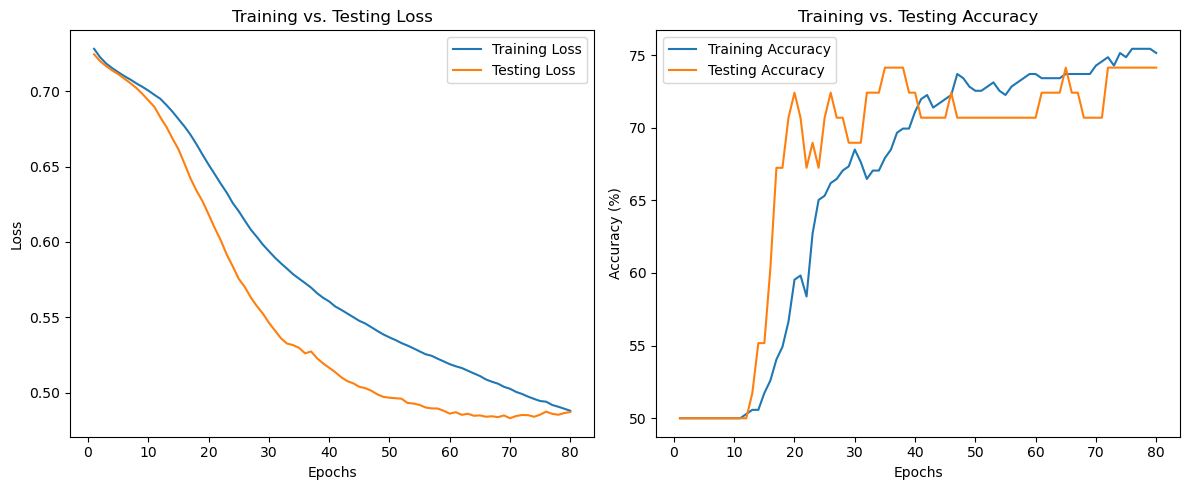

In [19]:
plot_training_results(results)